### Importing necessary libraries

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns  # For correlation heatmap
import pandas as pd
path = "Dataset.csv"

### Data Exploration

In [11]:
df.count()

Age        1000
Mileage    1000
Price      1000
dtype: int64

In [12]:
print('Mean Age:',df['Age'].mean())
print('Max Age:',df['Age'].max())
print('Min Age:',df['Age'].min())
print('Mean Mileage:',df['Mileage'].mean())
print('Max Mileage:',df['Mileage'].max())
print('Min Mileage:',df['Mileage'].min())
print('Mean Price:',df['Price'].mean())
print('Max Price:',df['Price'].max())
print('Min Price:',df['Price'].min())

Mean Age: 7.357
Max Age: 14
Min Age: 1
Mean Mileage: 45233.642
Max Mileage: 79988
Min Mileage: 10131
Mean Price: 3143.68057702629
Max Price: 16693.499678560598
Min Price: -11073.405596783428


In [10]:
df = pd.read_csv(path)
df.head()

,Age,Mileage,Price
0,13,54785,-1630.906879
1,6,44790,4255.863971
2,1,35735,9848.489578
3,4,10592,5943.521049
4,12,30183,-2310.300853


#### Visualisation of dataset

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


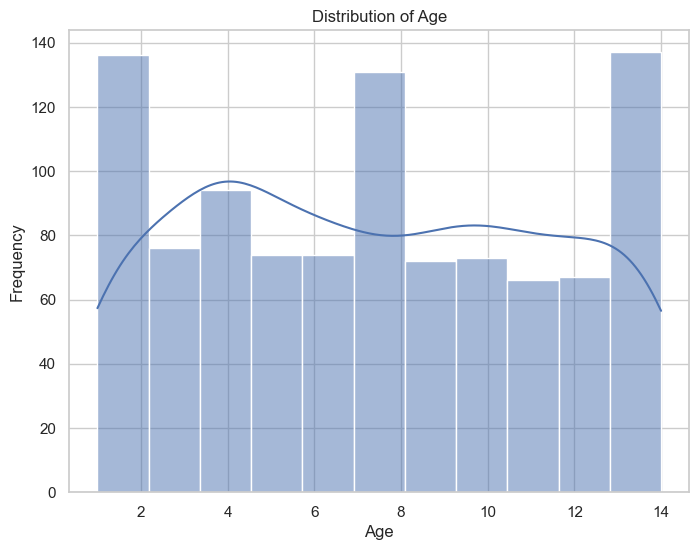

In [13]:
# Visualize the distribution of Age
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


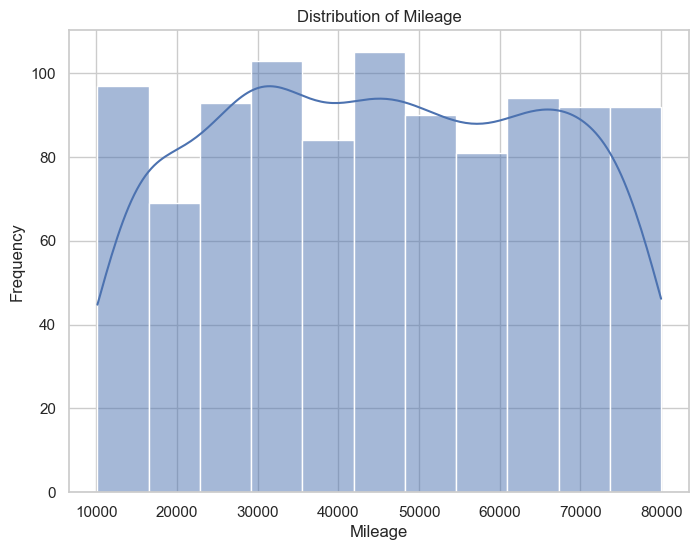

In [14]:
# Visualize the distribution of Mileage
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(df['Mileage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [15]:
data=df

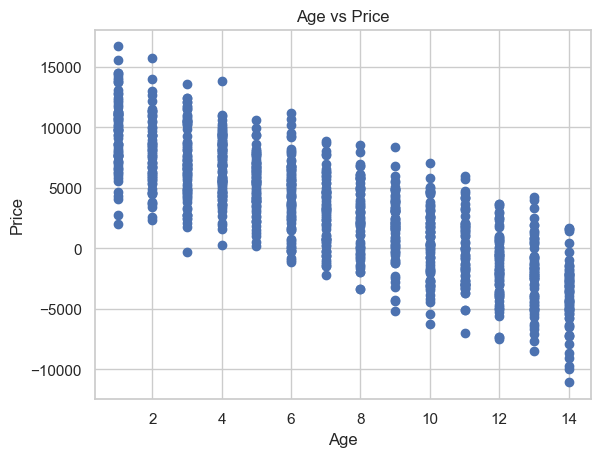

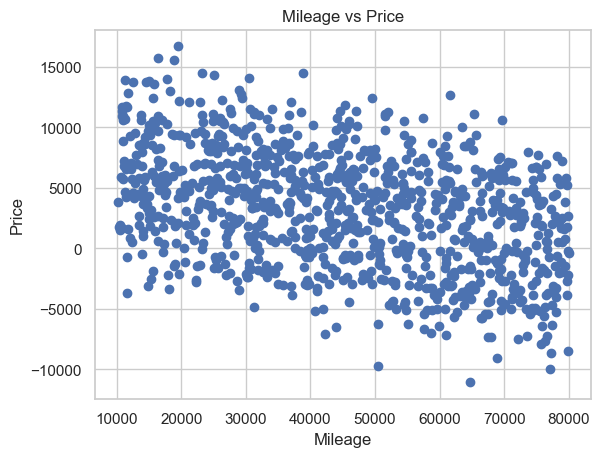

In [16]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between age and price
plt.scatter(data['Age'], data['Price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age vs Price')
plt.show()

# Scatter plot to visualize the relationship between mileage and price
plt.scatter(data['Mileage'], data['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show()

#### Scatter Plot

Text(0.5, 1.0, 'Mileage vs Price')

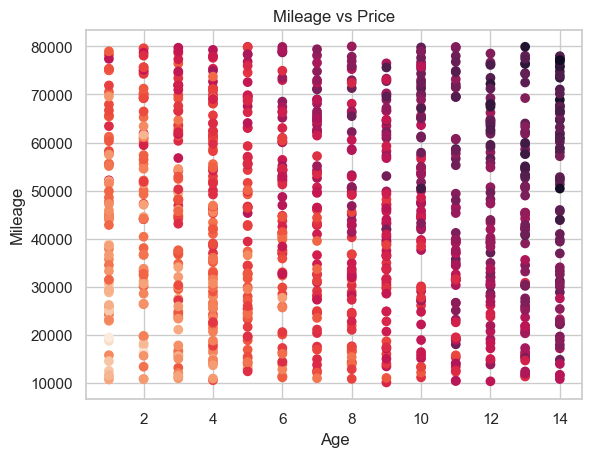

In [17]:
plt.scatter(df['Age'], df['Mileage'], c=df['Price'])
plt.xlabel('Age')
plt.ylabel('Mileage')
plt.title('Mileage vs Price')

#### Correlation heatmap

In [18]:
X = df[['Age', 'Mileage']]
Y = df['Price']

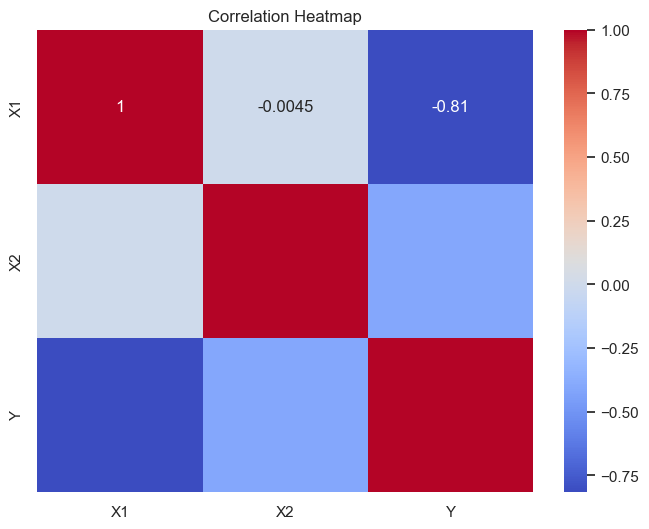

In [19]:
combined = np.column_stack((X.to_numpy(), Y.to_numpy()))
correlation_matrix = np.corrcoef(combined, rowvar=False)
plt.figure(figsize=(8, 6))
custom_labels = ['X1', 'X2', 'Y']
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=custom_labels, yticklabels=custom_labels)
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

In [20]:
X = df[['Age', 'Mileage']]
Y = df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.2, random_state=42)

In [21]:
X_train.shape

(800, 2)

In [22]:
Y_train.shape

(800,)

#### Standardisation

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Y_train = scaler_y.fit_transform(Y_train.reshape(-1,1))
# Y_test = scaler_y.transform(Y_test.reshape(-1,1))

In [24]:
X_train

array([[-0.58243807,  0.21208579],
       [ 0.42556724, -0.68313234],
       [-1.08644073,  0.14673701],
       ...,
       [-0.07843541, -0.69604198],
       [-0.33043674, -1.68863278],
       [ 0.9295699 ,  0.50600515]])

In [25]:
# Y_train

In [26]:
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)
n_samples, n_features = X_train.shape

In [27]:
Y_train=Y_train.reshape(n_samples)
Y_test=Y_test.reshape(X_test.shape[0])

In [28]:
Y_train.shape

torch.Size([800])

### SVM Regression Model - Using GridSearch

In [29]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, Y_train)

SVR(kernel='linear')

In [30]:
from sklearn.model_selection import GridSearchCV
svr =  svr
param_grid = {'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.5, 1]}
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_svr = grid_search.best_estimator_

In [31]:
best_svr.get_params()

{'C': 100,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Model Evaluation

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval(m):
    # Make predictions on the test set
    Y_pred = m.predict(X_test)
    
    # Calculate MAE
    mae = mean_absolute_error(Y_test, Y_pred)
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    
    # Calculate MSE
    mse = mean_squared_error(Y_test, Y_pred)
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    
    # Calculate R2
    r2 = r2_score(Y_test, Y_pred)
    print(f'R-squared (R2): {r2:.2f}')

    return mae,mse,r2


In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have the actual prices (y_test) and predicted prices (y_pred) from your SVM model
# If not, replace with your actual data

# Create a scatter plot to visualize the results
def plot(y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, y_pred, color='blue', label='Predicted Prices', alpha=0.7)
    plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Perfect Prediction')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual Prices vs. Predicted Prices')
    plt.legend()
    plt.grid()
    plt.show()


In [34]:
mae, mse, r2 = eval(best_svr)

Mean Absolute Error (MAE): 1658.28
Mean Squared Error (MSE): 4245854.13
R-squared (R2): 0.84


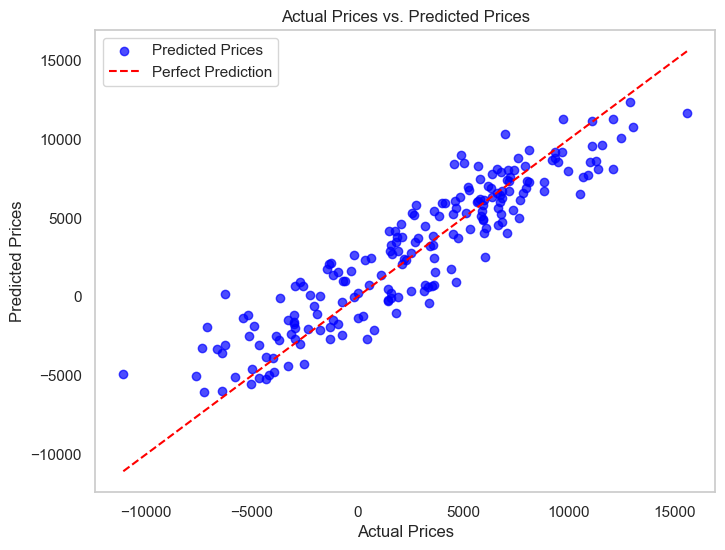

In [35]:
plot(best_svr.predict(X_test))

### Model Saving

In [37]:
import pickle

# save
with open('q1.pkl','wb') as f:
    pickle.dump(best_svr,f)

# load
with open('q1.pkl', 'rb') as f:
    best_svr = pickle.load(f)

### Tuning effect

c=0.1 eps=0.1
Mean Absolute Error (MAE): 4210.63
Mean Squared Error (MSE): 26205322.95
R-squared (R2): 0.01


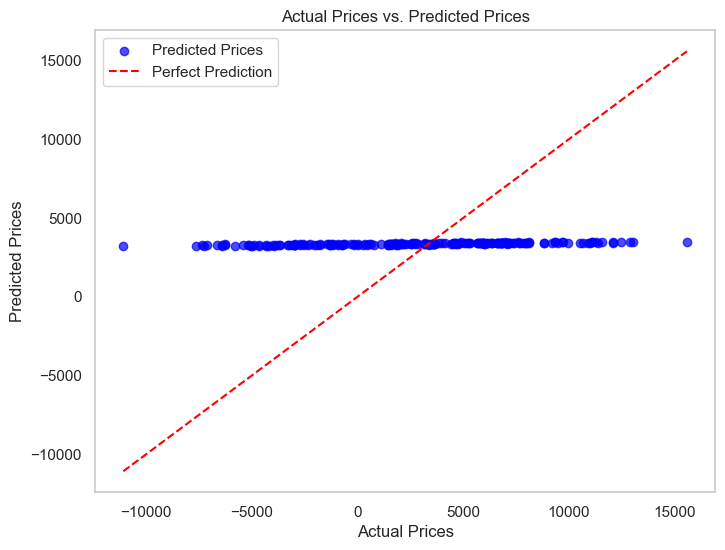

c=0.1 eps=0.2
Mean Absolute Error (MAE): 4210.63
Mean Squared Error (MSE): 26205322.95
R-squared (R2): 0.01


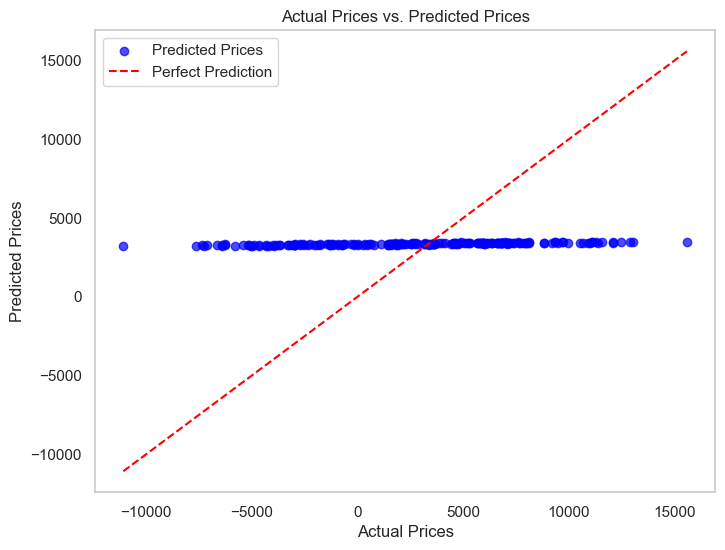

c=0.1 eps=0.5
Mean Absolute Error (MAE): 4210.63
Mean Squared Error (MSE): 26205322.95
R-squared (R2): 0.01


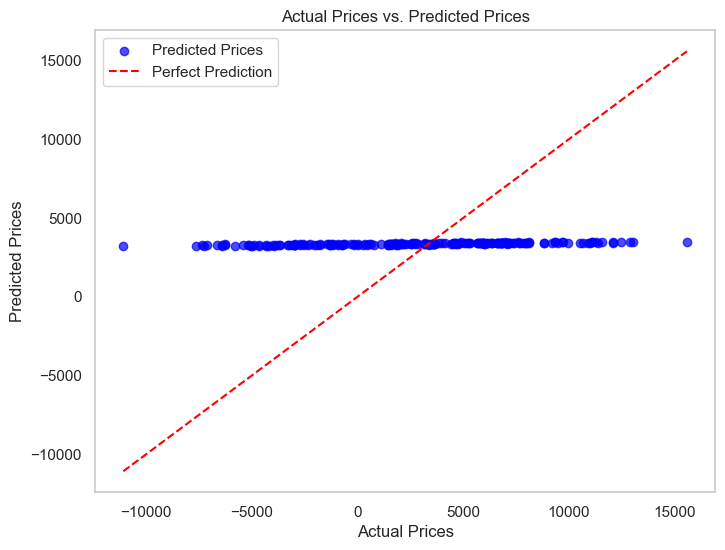

c=0.1 eps=1
Mean Absolute Error (MAE): 4210.63
Mean Squared Error (MSE): 26205322.95
R-squared (R2): 0.01


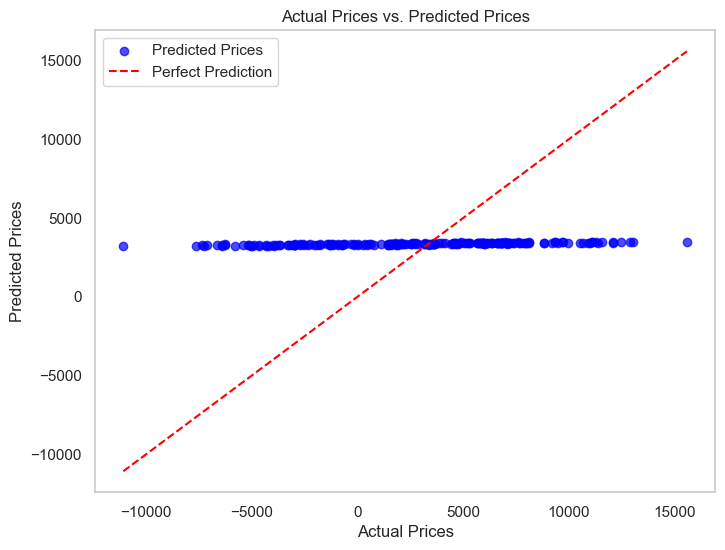

c=1 eps=0.1
Mean Absolute Error (MAE): 3773.00
Mean Squared Error (MSE): 21250891.61
R-squared (R2): 0.20


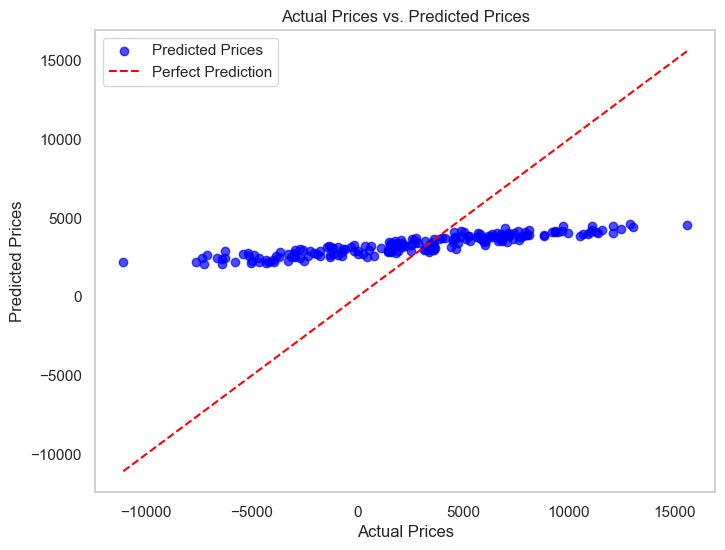

c=1 eps=0.2
Mean Absolute Error (MAE): 3773.00
Mean Squared Error (MSE): 21250891.61
R-squared (R2): 0.20


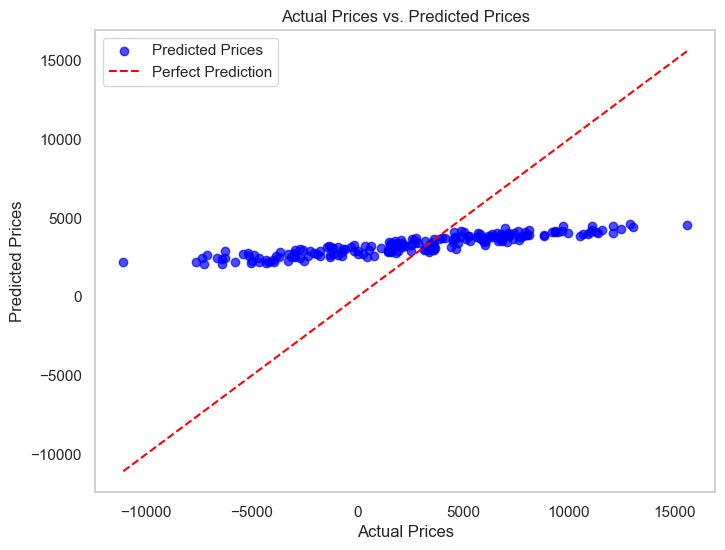

c=1 eps=0.5
Mean Absolute Error (MAE): 3773.00
Mean Squared Error (MSE): 21250891.61
R-squared (R2): 0.20


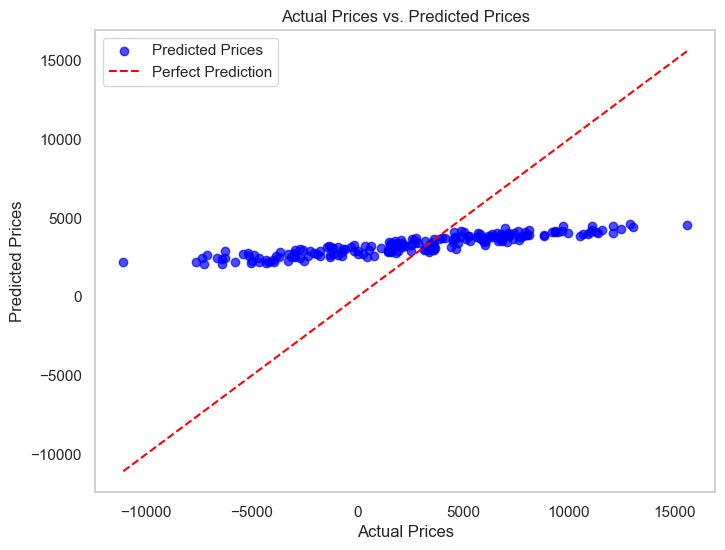

c=1 eps=1
Mean Absolute Error (MAE): 3773.00
Mean Squared Error (MSE): 21250891.61
R-squared (R2): 0.20


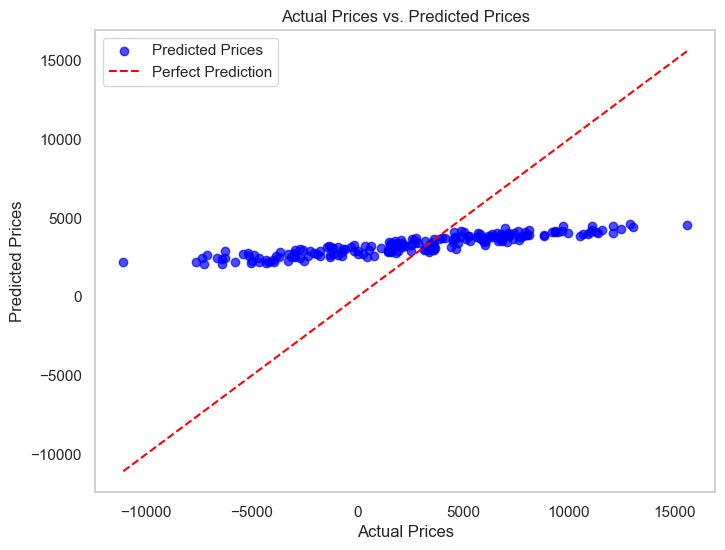

c=10 eps=0.1
Mean Absolute Error (MAE): 1951.70
Mean Squared Error (MSE): 5893355.44
R-squared (R2): 0.78


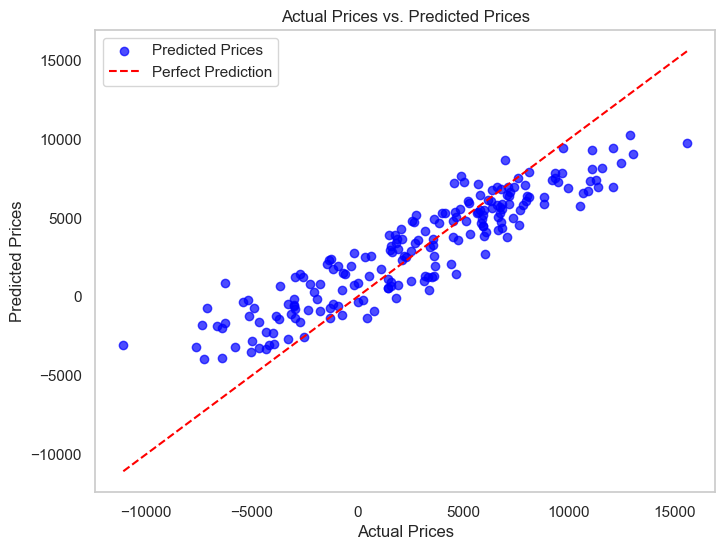

c=10 eps=0.2
Mean Absolute Error (MAE): 1951.69
Mean Squared Error (MSE): 5893275.24
R-squared (R2): 0.78


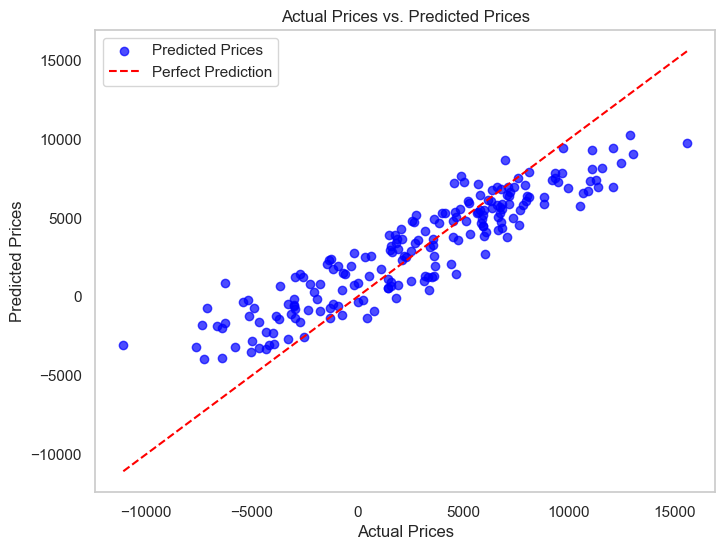

c=10 eps=0.5
Mean Absolute Error (MAE): 1951.67
Mean Squared Error (MSE): 5893035.66
R-squared (R2): 0.78


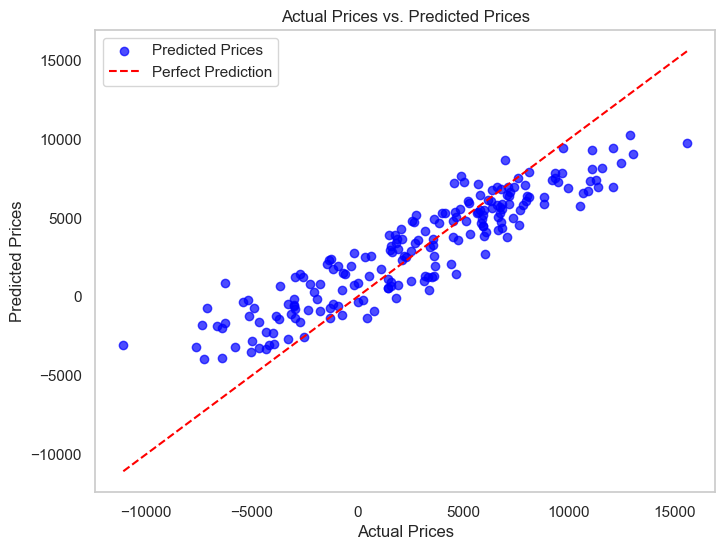

c=10 eps=1
Mean Absolute Error (MAE): 1951.62
Mean Squared Error (MSE): 5892636.76
R-squared (R2): 0.78


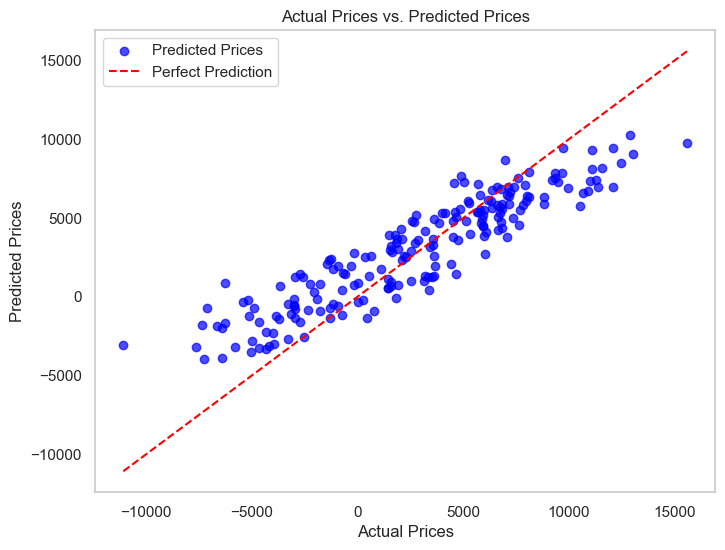

c=100 eps=0.1
Mean Absolute Error (MAE): 1658.29
Mean Squared Error (MSE): 4245673.37
R-squared (R2): 0.84


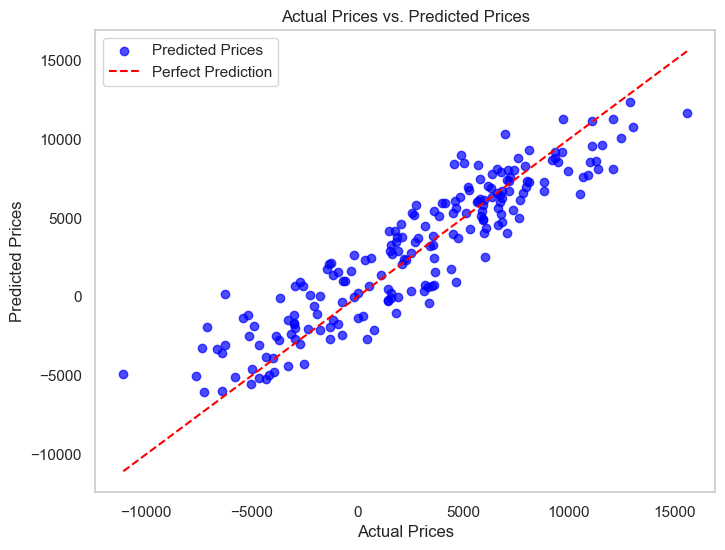

c=100 eps=0.2
Mean Absolute Error (MAE): 1658.29
Mean Squared Error (MSE): 4245693.54
R-squared (R2): 0.84


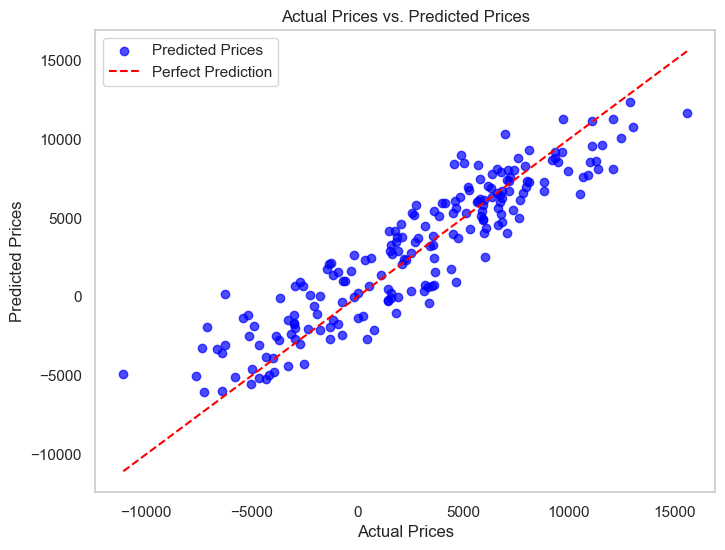

c=100 eps=0.5
Mean Absolute Error (MAE): 1658.29
Mean Squared Error (MSE): 4245753.68
R-squared (R2): 0.84


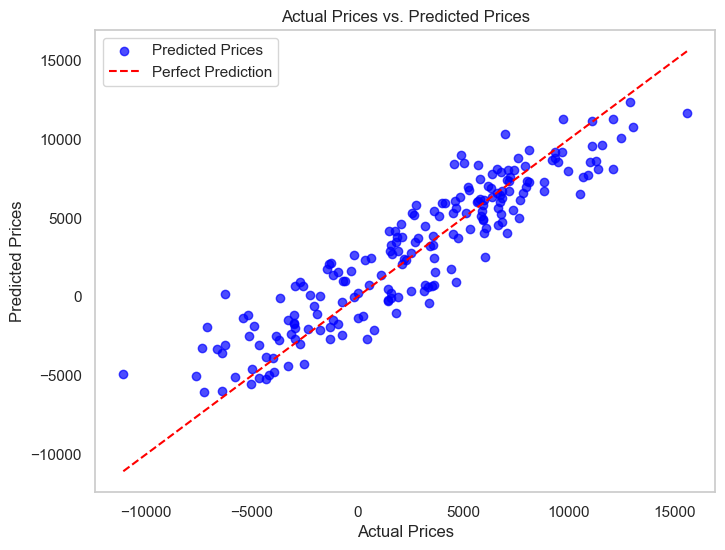

c=100 eps=1
Mean Absolute Error (MAE): 1658.28
Mean Squared Error (MSE): 4245854.13
R-squared (R2): 0.84


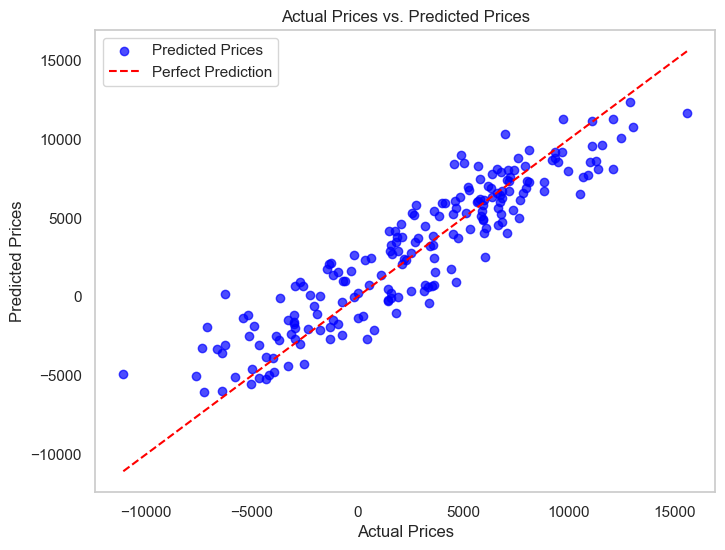

In [38]:
C=[0.1, 1, 10, 100]
eps=[0.1, 0.2, 0.5, 1]

c_arr=[]
e_arr=[]
mae_arr=[]
mse_arr=[]
r2_arr=[]


for cc in C:
    for e in eps:
        print(f'c={cc} eps={e}')
        svr = SVR(kernel='linear', C=cc, epsilon=e)
        svr.fit(X_train, Y_train)
        mae,mse,r2=eval(svr)
        plot(svr.predict(X_test))
        c_arr.append(cc)
        e_arr.append(e)
        mae_arr.append(mae)
        mse_arr.append(mse)
        r2_arr.append(r2)
        

Text(0.5, 1.0, 'MAE-MSE')

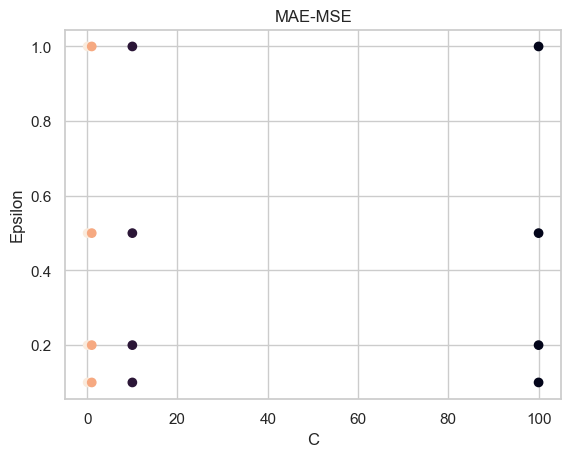

In [39]:
plt.scatter(c_arr, e_arr, c=mae_arr)
plt.xlabel('C')
plt.ylabel('Epsilon')
plt.title('MAE-MSE')

Text(0.5, 1.0, 'R2 score')

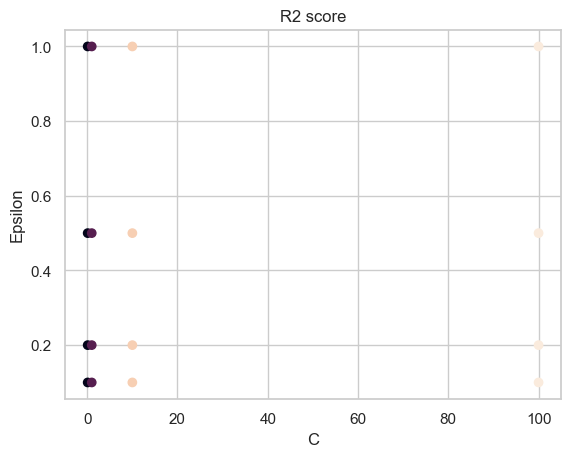

In [40]:
plt.scatter(c_arr, e_arr, c=r2_arr)
plt.xlabel('C')
plt.ylabel('Epsilon')
plt.title('R2 score')

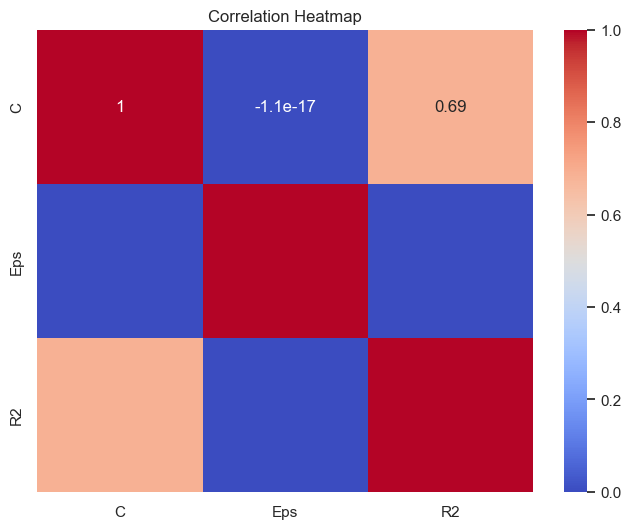

In [41]:
combined = np.column_stack((np.asarray(c_arr), np.asarray(e_arr), np.asarray(r2_arr)))
correlation_matrix = np.corrcoef(combined, rowvar=False)
plt.figure(figsize=(8, 6))
custom_labels = ['C', 'Eps', 'R2']
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=custom_labels, yticklabels=custom_labels)
plt.title('Correlation Heatmap')
plt.show()

### Linear regression

In [42]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [43]:
mae, mse, r2 = eval(linear_reg)

Mean Absolute Error (MAE): 1638.94
Mean Squared Error (MSE): 4156483.25
R-squared (R2): 0.84


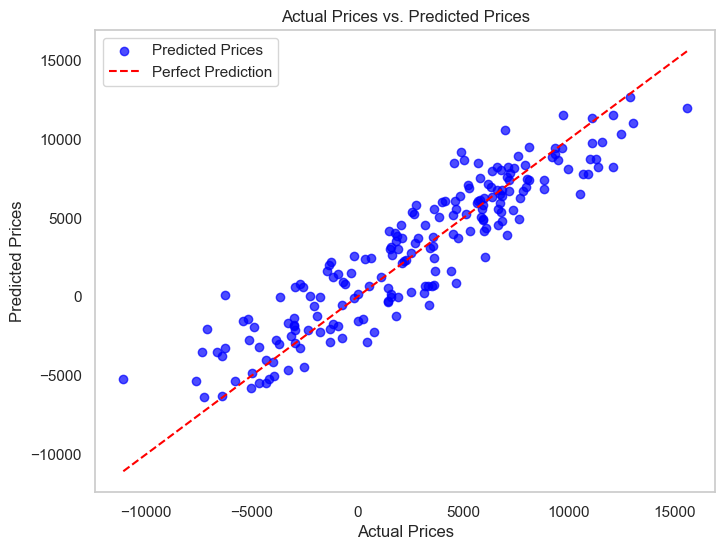

In [44]:
plot(linear_reg.predict(X_test))

### DT Regression

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [46]:
mae, mse, r2 = eval(tree_reg)

Mean Absolute Error (MAE): 2382.67
Mean Squared Error (MSE): 9125980.44
R-squared (R2): 0.65


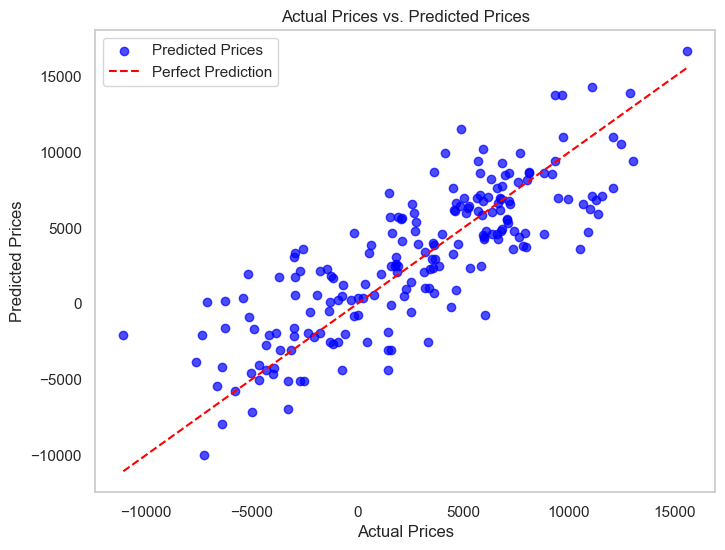

In [47]:
plot(tree_reg.predict(X_test))

### Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [49]:
mae, mse, r2 = eval(rf_reg)

Mean Absolute Error (MAE): 2002.15
Mean Squared Error (MSE): 6333297.38
R-squared (R2): 0.76


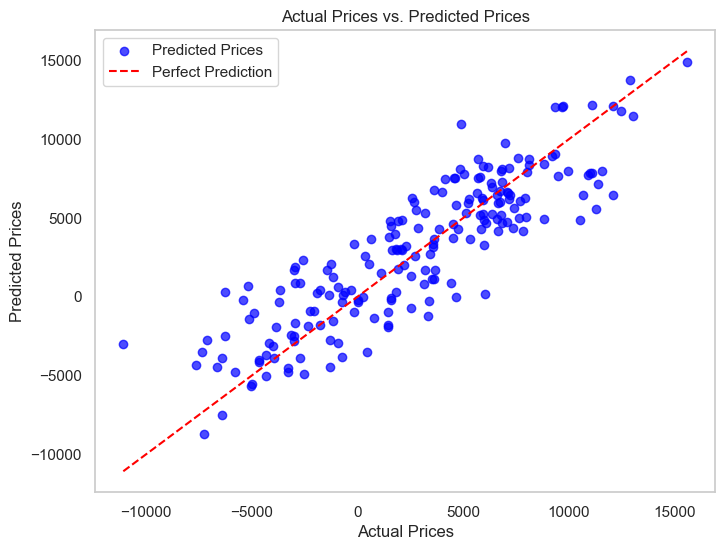

In [50]:
plot(rf_reg.predict(X_test))